# Part 1) Load the data and make a datetime index.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv"
df = pd.read_csv(url)
df


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


Convert the date column to datetime dtype.

In [2]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

Set the date column as the index.


In [3]:
df = df.set_index('date')
df


,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


Filter out only the required data:

Keep only data from the year 2000 or later.

Keep only the following features:

    precipitation
    mean_temp
    min_temp
    max_temp
    snow_depth

In [4]:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]

df


,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


Impute any missing values.

We will interpolate the mean, min and max temps to keep the values there consistent.

In [5]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [7]:
df['snow_depth'].value_counts()

0.0     5865
1.0       18
2.0       17
3.0        9
4.0        4
7.0        2
5.0        2
12.0       1
6.0        1
Name: snow_depth, dtype: int64

Snow depth is almost always 0 so we will just fill the NA with 0.

In [9]:
df['precipitation'].value_counts()


0.0     3663
0.2      689
0.4      289
0.6      176
1.0      159
        ... 
31.2       1
24.4       1
26.0       1
29.2       1
31.0       1
Name: precipitation, Length: 145, dtype: int64

Precipitation is almost always 0 as well so we will also just fill the NA with 0.

In [10]:
## interpolating temperature measures
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [13]:
# filling preciptation/snow with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)


In [14]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)

For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.

Plot the feature that the question is asking about.
    If there is a specific time period, plot only that time period.

Q1: What month had the most precipitation between 2000 through 2010?
    
Resample the data as Monthly frequency.

Find the date and corresponding value for the max precipitation.

Plot the feature and time period that corresponds to the question.
    Make sure to meet the "Visualization Requirements" below!
    
Determine the date and value for the most precipitation (the max precipitation).

Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
    Make sure to add a legend so that your label is visible.

In [15]:
precip_cols = ['precipitation']
plot_df  = df.loc["2000":"2010",precip_cols]
plot_df

,precipitation
date,
2000-01-01,0.0
2000-01-02,0.2
2000-01-03,6.0
2000-01-04,0.2
2000-01-05,0.8
...,...
2010-12-27,5.0
2010-12-28,0.4
2010-12-29,1.4


Resample the data as Monthly frequency.

In [16]:
precip_MS_res = plot_df.resample("MS").mean()
precip_MS_res.name = 'Resampled'
precip_MS_res

,precipitation
date,
2000-01-01,0.461290
2000-02-01,2.144828
2000-03-01,0.432258
2000-04-01,2.393333
2000-05-01,2.206452
...,...
2010-08-01,2.703226
2010-09-01,1.266667
2010-10-01,1.967742


Find the date and corresponding value for the max precipitation.

In [17]:
max_date = precip_MS_res['precipitation'].idxmax()
max_date

Timestamp('2009-11-01 00:00:00', freq='MS')

In [18]:
max_precip = precip_MS_res['precipitation'].max()
max_precip

4.613333333333333

The month of November 2019 had the highest preciptiation.

<AxesSubplot: xlabel='date'>

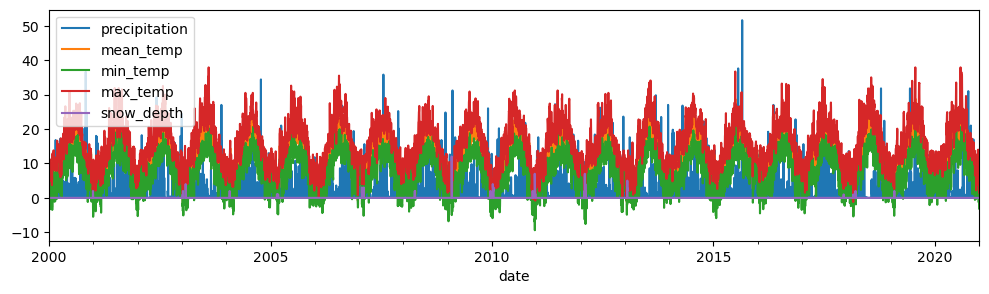

In [37]:
fig, ax = plt.subplots(figsize=(12,3))
df.plot(ax=ax)

In [22]:
from matplotlib import dates as mdates

Q1 Visualization Requirements

Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:

    Create a wide figure (e.g. figsize=(12,3))
        With a title of "Precipitation for 2000-2010"
        With a ylabel of "Inches"
    Customize the major xaxis ticks to:
        Have major xaxis ticks every 1 year.
        Use 4-digit years for the labels
        Have the major ticks' labels rotated 90 degrees.
    Customize the minor xaxis ticks to:
        Have minor xaxis ticks every 3 months
        Do not label the minor ticks.

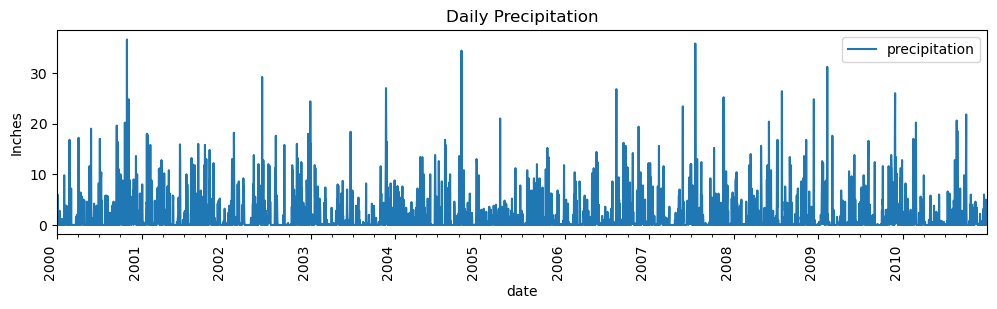

In [23]:
ax = plot_df.plot(figsize=(12,3))
ax.set( title='Daily Precipitation',
      ylabel='Inches')

# customize major ticks 
major_loc =  mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=3)

ax.xaxis.set_minor_locator(minor_loc)


## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate()
fig.autofmt_xdate(which='major',rotation=90)

Determine the date and value for the most precipitation (the max precipitation).

In [38]:
date_max_precip = plot_df['precipitation'].idxmax()
max_precip = plot_df['precipitation'].max()

print(f"The highest daily preciptation was {max_precip} inches, which occured on {date_max_precip.strftime('%B %d, %Y')} which was a Sunday")

The highest daily preciptation was 36.6 inches, which occured on October 29, 2000 which was a Sunday


Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.


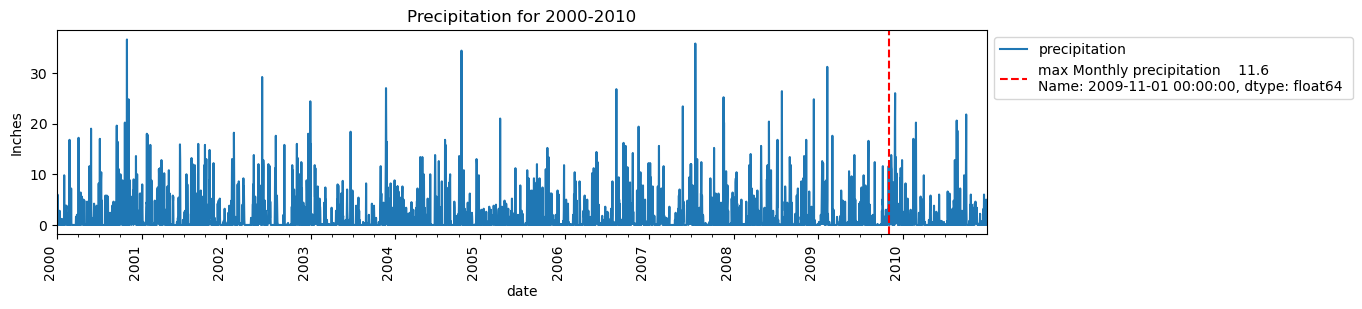

In [25]:
ax = plot_df.plot(figsize=(12,3))
ax.set( title='Precipitation for 2000-2010',
      ylabel='Inches')
fmt = "%m/%Y"

# customize major ticks 
major_loc =  mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=3)

ax.xaxis.set_minor_locator(minor_loc)


## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate()
fig.autofmt_xdate(which='major',rotation=90)

ax.axvline(max_date, ls='--',color='red',label=f"max Monthly {plot_df.loc[max_date]} ")

ax.legend(bbox_to_anchor=(1.0, 1.0))


Q2: Which year between 2000-2020 had the coolest average temperature?

Resample the data as Yearly frequency.

Find the date and corresponding value for the max mean temp.

Plot the feature and time period that corresponds to the question.
    Make sure to meet the "Visualization Requirements" below!

Determine the date and value for the lowest mean temp.

Add a vertical line at this date with a label that says the date (using date format: "2000") and the max precipitation value.

and what was the temperature?


# Resample the data as Yearly frequency. 

In [26]:
meantemp_cols = ['mean_temp','precipitation']
plot2_df  = df.loc["2000":,meantemp_cols]
plot2_df

,mean_temp,precipitation
date,,
2000-01-01,7.0,0.0
2000-01-02,7.9,0.2
2000-01-03,9.4,6.0
2000-01-04,7.0,0.2
2000-01-05,6.4,0.8
...,...,...
2020-12-27,7.5,2.0
2020-12-28,1.1,0.2
2020-12-29,2.6,0.0


In [28]:
meantemp_ys = plot2_df.resample("YS").mean()
meantemp_ys.name = 'Resampled2'
meantemp_ys

,mean_temp,precipitation
date,,
2000-01-01,11.575683,1.974863
2001-01-01,11.331507,1.850411
2002-01-01,12.084247,2.060000
2003-01-01,12.114521,1.261096
2004-01-01,11.900683,1.622131
2005-01-01,11.822877,1.155068
2006-01-01,12.290822,1.656986
2007-01-01,11.944384,1.778356
2008-01-01,11.326776,1.698361


Find the date and corresponding value for the max mean temp

In [29]:
max_date2 = plot2_df['precipitation'].idxmax()
max_date2

Timestamp('2015-08-26 00:00:00')

In [30]:
max_date_values = plot2_df.loc['2015-08-26']
max_date_values

mean_temp        17.0
precipitation    51.6
Name: 2015-08-26 00:00:00, dtype: float64

In [31]:
max_date_values['mean_temp']

17.0

In [32]:
meantemp_ys['mean_temp'].max()

12.723633879781422

In [33]:
meantemp_ys['mean_temp'].idxmax()

Timestamp('2020-01-01 00:00:00', freq='AS-JAN')

Determine the date and value for the lowest mean temp.

In [39]:
date_min_temp = plot2_df['mean_temp'].idxmin()
min_temp = plot2_df['mean_temp'].min()

print(f"The lowest mean temperature of {min_temp} degrees occured on {date_min_temp.strftime('%B %d, %Y')} which was a {date_min_temp}")

The lowest mean temperature of -4.1 degrees occured on December 20, 2010 which was a 2010-12-20 00:00:00


Plot the feature and time period that corresponds to the question. Add a vertical line at this date with a label that says the date (using date format: "2000") and the max precipitation value. and what was the temperature?

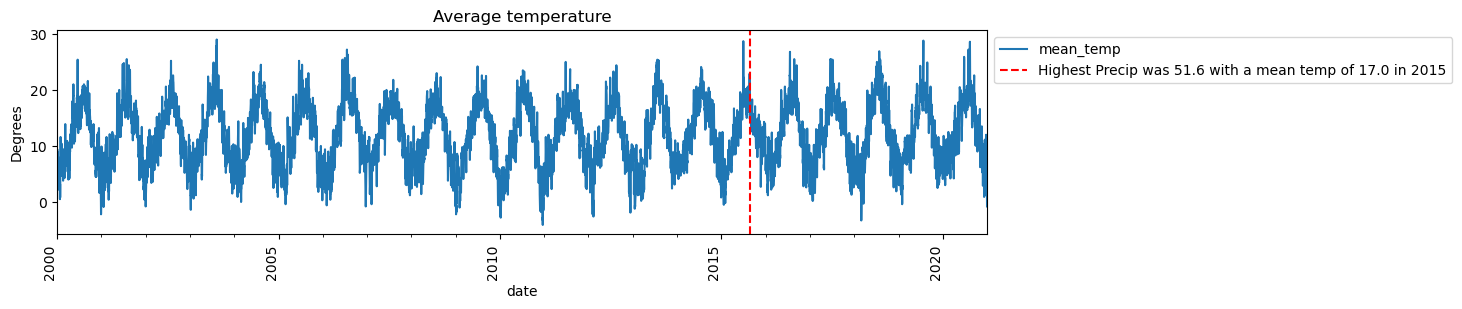

In [35]:
ax = plot2_df['mean_temp'].plot(figsize=(12,3))
ax.set( title='Average temperature',
      ylabel='Degrees')
fmt = "%Y"


# customize major ticks 
major_loc =  mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.YearLocator(1)

ax.xaxis.set_minor_locator(minor_loc)


## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate()
fig.autofmt_xdate(which='major',rotation=90)
ax.axvline(max_date2, ls='--',color='red',label=f"Highest Precip was {max_date_values['precipitation']} with a mean temp of {max_date_values['mean_temp']} in {plot2_df['precipitation'].idxmax().strftime(fmt)}")

ax.legend(bbox_to_anchor=(1.0, 1.0))
